# Задача3 Алгоритм кластеризации kmeans

В качестве датасета возьмем MNIST, предварительно уменьшим размерность с помощью PCA и tSNE.

In [1]:
import sys
import pylab as plt
import numpy as np

In [65]:
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

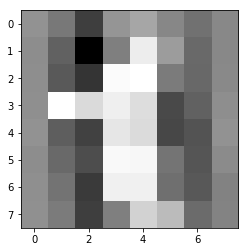

In [34]:
import numpy as np
from matplotlib import pyplot as plt
plt.imshow(data[1].reshape((8,8)),cmap='gray')
plt.show()

In [51]:
reduced_data = PCA(n_components=2).fit_transform(data)

In [57]:
reduced_data = np.array(reduced_data).T

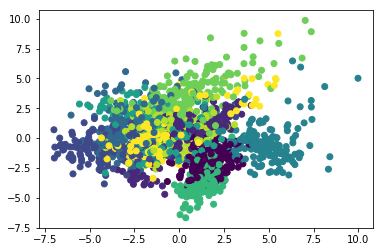

In [64]:
plt.scatter(reduced_data[0], reduced_data[1], c = digits.target)
plt.show()

In [70]:
reduced_data_tsne = TSNE(n_components=2).fit_transform(data)

In [71]:
reduced_data_tsne = np.array(reduced_data_tsne).T

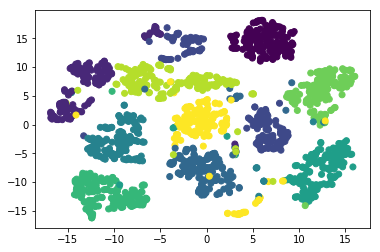

In [73]:
plt.scatter(reduced_data_tsne[0], reduced_data_tsne[1], c = digits.target)
plt.show()

In [91]:
def kMeans(X, K, maxIters = 10, plot_progress = None):
    ''' The most basic realization of kmeans. '''
    centroids = X[np.random.choice(np.arange(len(X)), K), :]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]) for x_i in X])
        # Move centroids step
        centroids = [X[C == k].mean(axis = 0) for k in range(K)]
    return np.array(centroids) , C

In [100]:
centroids, C = kMeans(reduced_data.T, K = 10)

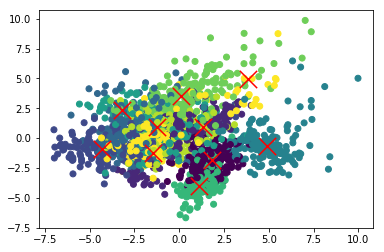

In [101]:
plt.scatter(reduced_data[0], reduced_data[1], c = digits.target)
plt.scatter(centroids.T[0], centroids.T[1], marker='x', s = 300, color = 'red')
plt.show()

In [97]:
centroids, C = kMeans(reduced_data_tsne.T, K = 10)

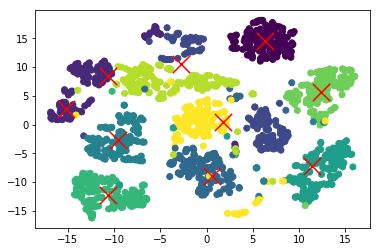

In [99]:
plt.scatter(reduced_data_tsne[0], reduced_data_tsne[1], c = digits.target)
plt.scatter(centroids.T[0], centroids.T[1], marker='x', s = 300, color = 'red')
plt.show()